#### Bibliotecas básicas

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#### Bibliotecas relacionadas a preparação dos dados

In [18]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/marcos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/marcos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marcos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Bibliotecas relacionadas aos modelos

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#### Caminho do dataset

In [5]:
root = Path('../datasets/')
input_path = root / 'input/'

#### Leitura do dataset

In [6]:
df = pd.read_csv(input_path / 'bbc-text.csv')

#### Informações do dataset

In [7]:
df.shape

(2225, 2)

In [8]:
df.columns

Index(['category', 'text'], dtype='object')

In [9]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

#### Histograma categoria relacionado ao número de sentenças

<function matplotlib.pyplot.show(close=None, block=None)>

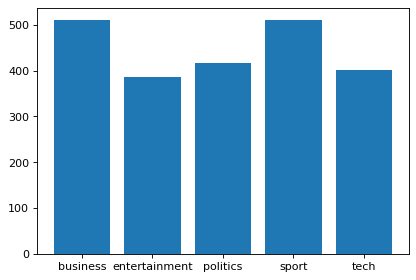

In [10]:
x = df['category']
plt.figure(figsize=(6,4), dpi=80)
labels, counts = np.unique(x, return_counts=True)
plt.bar(labels, counts, align='center')
plt.hist(x)
plt.show

#### Dividindo sentenças em palavras (tokenize)

In [11]:
df['text_clean'] = df['text'].apply(nltk.word_tokenize)
df['text_clean']

0       [tv, future, in, the, hands, of, viewers, with...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, of, farrell, gamble, leicester,...
3       [yeading, face, newcastle, in, fa, cup, premie...
4       [ocean, s, twelve, raids, box, office, ocean, ...
                              ...                        
2220    [cars, pull, down, us, retail, figures, us, re...
2221    [kilroy, unveils, immigration, policy, ex-chat...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [how, political, squabbles, snowball, it, s, b...
2224    [souness, delight, at, euro, progress, boss, g...
Name: text_clean, Length: 2225, dtype: object

#### Removendo stop words

In [12]:
stop_words = set(nltk.corpus.stopwords.words('english'))
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
df['text_clean']

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, ex-chat...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Name: text_clean, Length: 2225, dtype: object

#### Removendo números, pontuações e caracteres especiais

In [13]:
regex = '[a-z]+'
df['text_clean'] = df['text_clean'].apply(lambda x: [item for item in x if re.match(regex, item)])
df['text_clean']

0       [tv, future, hands, viewers, home, theatre, sy...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, farrell, gamble, leicester, say...
3       [yeading, face, newcastle, fa, cup, premiershi...
4       [ocean, twelve, raids, box, office, ocean, twe...
                              ...                        
2220    [cars, pull, us, retail, figures, us, retail, ...
2221    [kilroy, unveils, immigration, policy, ex-chat...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [political, squabbles, snowball, become, commo...
2224    [souness, delight, euro, progress, boss, graem...
Name: text_clean, Length: 2225, dtype: object